# 1. Import Libraries


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 2. Load Dataset


In [43]:
df = pd.read_csv("Netflix Dataset.csv")

# 3. Dataset overview

In [44]:
df.shape

(7789, 11)

In [45]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [46]:
df.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [47]:
df.dropna(inplace=True)


In [48]:
df.isna().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [49]:
df.shape

(4811, 11)

In [50]:
df.describe()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,4811,4811,4811,4811,4811,4811,4811,4811,4811,4811,4811
unique,4809,2,4809,3614,4689,544,1291,14,195,324,4804
top,s684,Movie,Backfire,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",TV-MA,93 min,"Dramas, International Movies",When Elastigirl gets recruited for a high-prof...
freq,2,4675,2,18,10,1655,100,1668,121,306,2


In [51]:
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [52]:
cols=['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

In [53]:
for col in cols:
    print(df[col].value_counts())
    print("----"*5)

Show_Id
s684     2
s6621    2
s9       1
s10      1
s7733    1
        ..
s7779    1
s7781    1
s7782    1
s7783    1
s7       1
Name: count, Length: 4809, dtype: int64
--------------------
Category
Movie      4675
TV Show     136
Name: count, dtype: int64
--------------------
Title
Backfire             2
The Lost Okoroshi    2
706                  1
1920                 1
You're My Boss       1
                    ..
Zombieland           1
Zoo                  1
Zoom                 1
Zozo                 1
122                  1
Name: count, Length: 4809, dtype: int64
--------------------
Director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Liu Kuang-hui              1
Kenneth Gyang              1
Abu Bakr Shawky            1
Paul Greengrass            1
John Suits                 1
Name: count, Length: 3614, dtype: int64
--------------------
Cast
Samuel W

# 4.data visualization

<Axes: xlabel='Category', ylabel='count'>

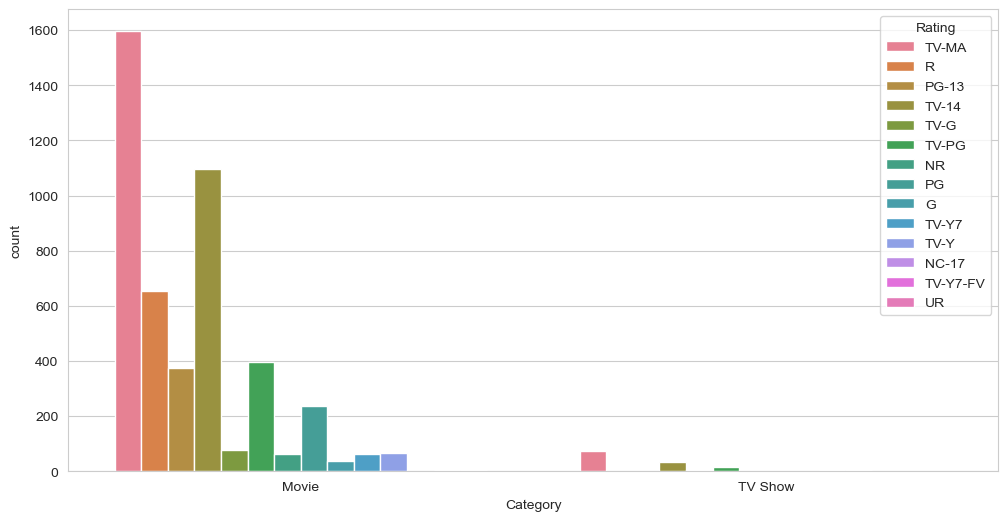

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Category'],hue=df['Rating'])

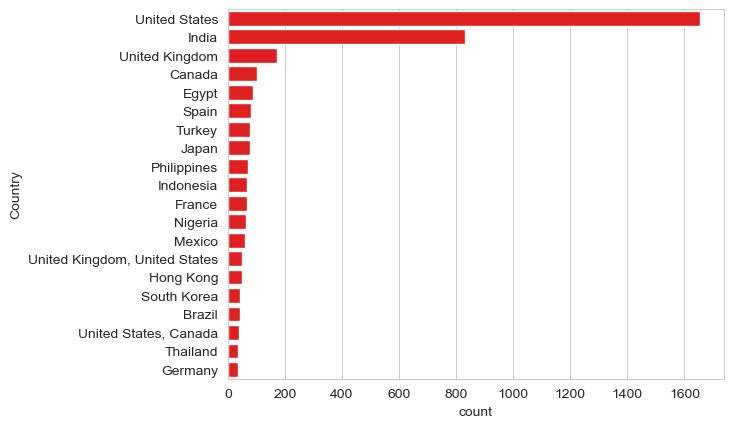

In [55]:
top_cats = df['Country'].value_counts().head(20).index
sns.countplot(y='Country', data=df[df['Country'].isin(top_cats)], order=top_cats,color='red')
plt.show()

In [56]:
df['Duration_num'] = df['Duration'].astype(str).str.extract('(\d+)').astype(float)
mean_duration = df.loc[df['Duration'].str.contains('min', na=False), 'Duration_num'].mean()
def convert_duration(x):
    if pd.isna(x):
        return np.nan
    x = str(x)
    if 'min' in x:
        return int(x.replace('min', '').strip())
    elif 'Season' in x:
        # Extract the number before 'Season(s)' (default 1 if not present)
        n_seasons = int(''.join(filter(str.isdigit, x)) or 1)
        return n_seasons * mean_duration
    else:
        return np.nan
df['Duration_final'] = df['Duration'].apply(convert_duration)
df = df.dropna(subset=['Duration_final']).reset_index(drop=True)
print(df[['Duration', 'Duration_final']])

      Duration  Duration_final
0       93 min       93.000000
1       78 min       78.000000
2       80 min       80.000000
3      123 min      123.000000
4     1 Season      102.396791
...        ...             ...
4806    88 min       88.000000
4807    94 min       94.000000
4808    88 min       88.000000
4809    99 min       99.000000
4810   111 min      111.000000

[4811 rows x 2 columns]


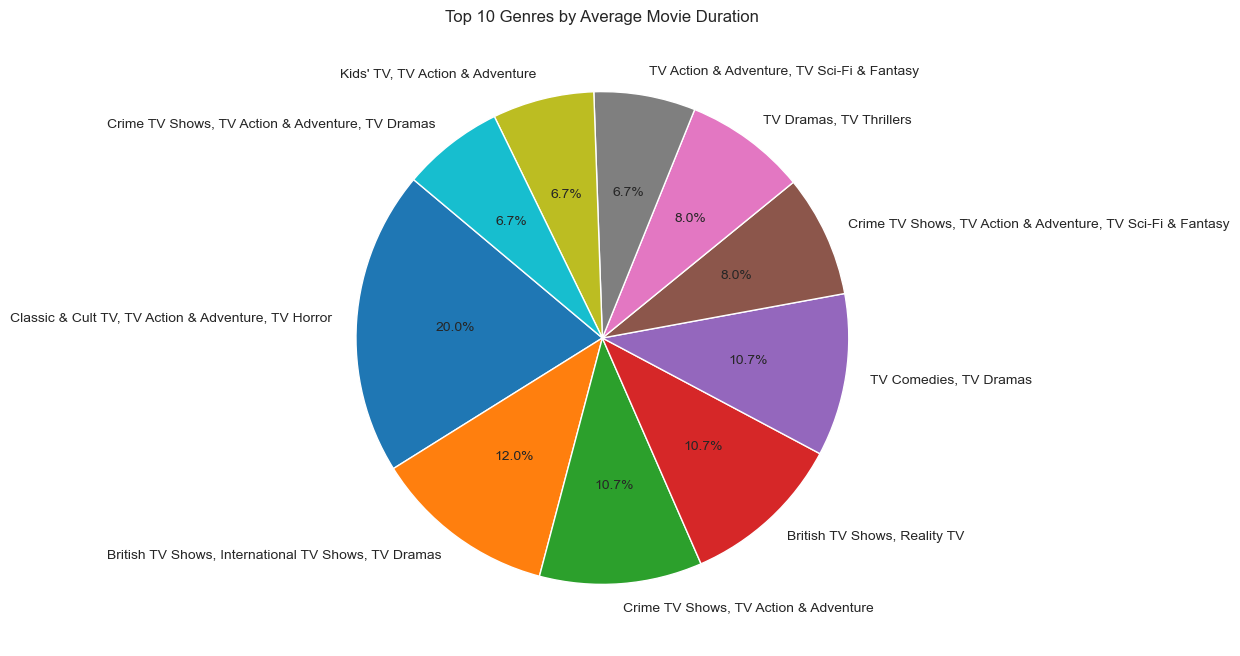

In [57]:
avg_duration = df.groupby('Type')['Duration_final'].mean()
top_n = 10
avg_duration = avg_duration.sort_values(ascending=False).head(top_n)
plt.figure(figsize=(8, 8))
plt.pie(avg_duration, labels=avg_duration.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Genres by Average Movie Duration')
plt.show()

In [58]:
top_country=df.groupby('Category')['Country']
top_country.value_counts()

Category  Country                                                      
Movie     United States                                                    1628
          India                                                             827
          United Kingdom                                                    155
          Canada                                                            101
          Egypt                                                              87
                                                                           ... 
TV Show   United Kingdom, Germany, United States, France                      1
          United Kingdom, Ireland, United States                              1
          United Kingdom, United States, Spain, Germany, Greece, Canada       1
          United States, Ireland                                              1
          United States, Israel, Italy, South Africa                          1
Name: count, Length: 576, dtype: int64

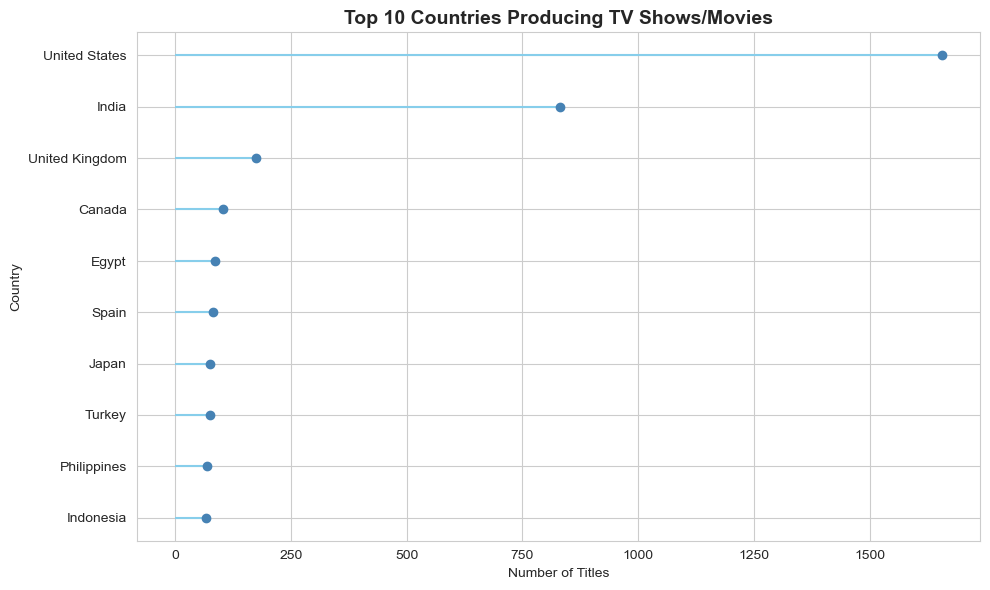

In [59]:
country_count = df['Country'].value_counts().head(10).reset_index()
country_count.columns = ['Country', 'Count']
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
country_count = country_count.sort_values('Count')
plt.hlines(y=country_count['Country'], xmin=0, xmax=country_count['Count'], color='skyblue')
plt.plot(country_count['Count'], country_count['Country'], "o", color='steelblue')
plt.title("Top 10 Countries Producing TV Shows/Movies", fontsize=14, weight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

<Axes: xlabel='Duration_final', ylabel='Rating'>

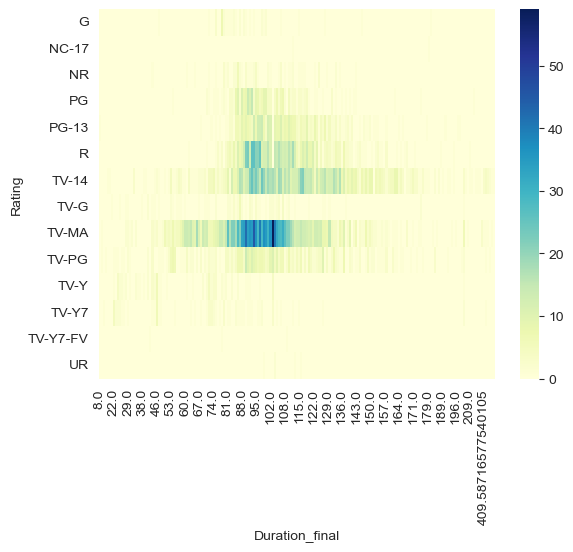

In [60]:
heat_data = df.groupby(['Rating','Duration_final']).size().unstack(fill_value=0)
sns.heatmap(heat_data, cmap='YlGnBu')


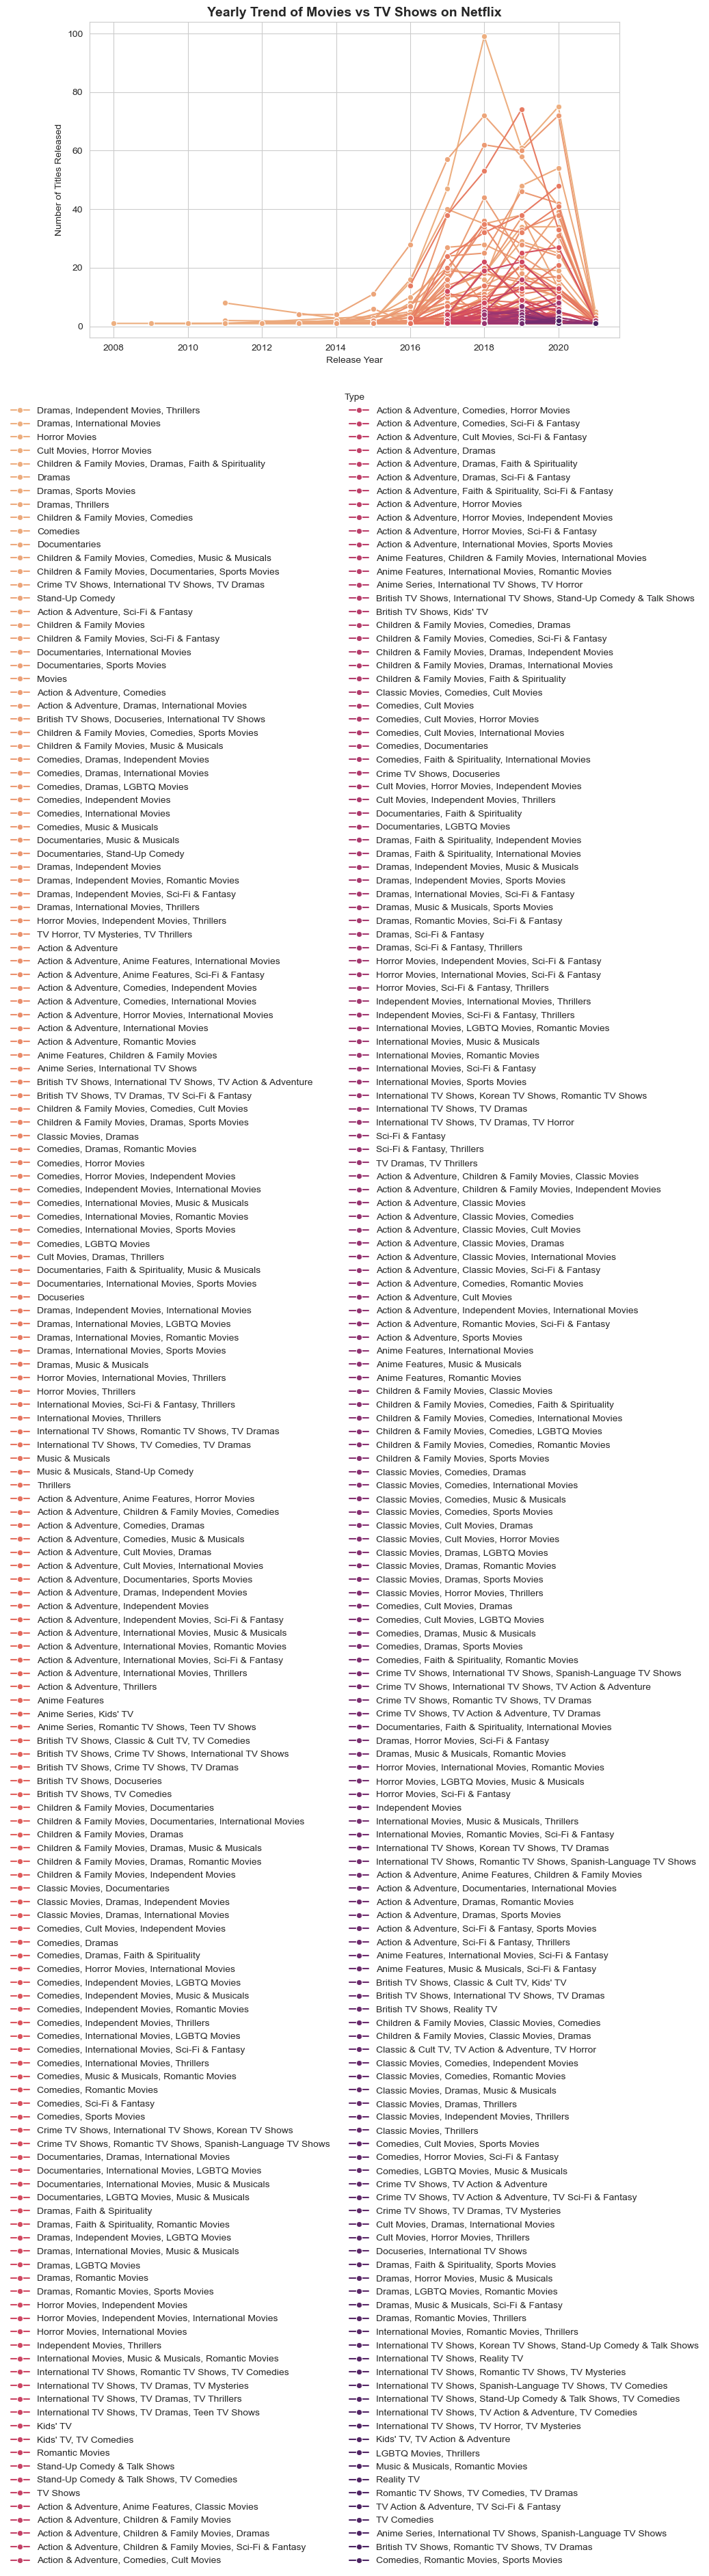

In [61]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%B %d, %Y', errors='coerce')

# Extract year
df['Year'] = df['Release_Date'].dt.year

# Drop rows where Year couldn't be parsed
df = df.dropna(subset=['Year'])

# Group and count titles per year and type
yearly = df.groupby(['Year', 'Type']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.lineplot(
    data=yearly,
    x='Year',
    y='Count',
    hue='Type',
    marker='o',
    palette='flare'
)

plt.title("Yearly Trend of Movies vs TV Shows on Netflix", fontsize=14, weight='bold')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.legend(
    title='Type',
    loc='upper center',       # Centered horizontally
    bbox_to_anchor=(0.5, -0.15),  # Move below the plot
    ncol=2,                   # Two columns (Movies | TV Shows)
    frameon=False
)
plt.tight_layout()
plt.show()
